In [5]:
import os
# os.chdir(r'C:\Users\morel.DESKTOP-PJ169O3\Documents\TravailDeRecherche\Library')
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt
import copy
from scatcov.frontend import *

# Generate Synthetic Data

Data saving dir: MRW_T_2049_none_H_5_0e_01_la_2_0e_01
MRW: generating data.
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/73728222.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/98138194.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/96406592.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/20304280.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/68140974.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/40356180.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/81306223.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/36332020.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/23437747.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/79334276.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/42951699.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/87085539.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/63090383.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/16314364.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/95169173.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/41540616.npy
Saved: MRW_T

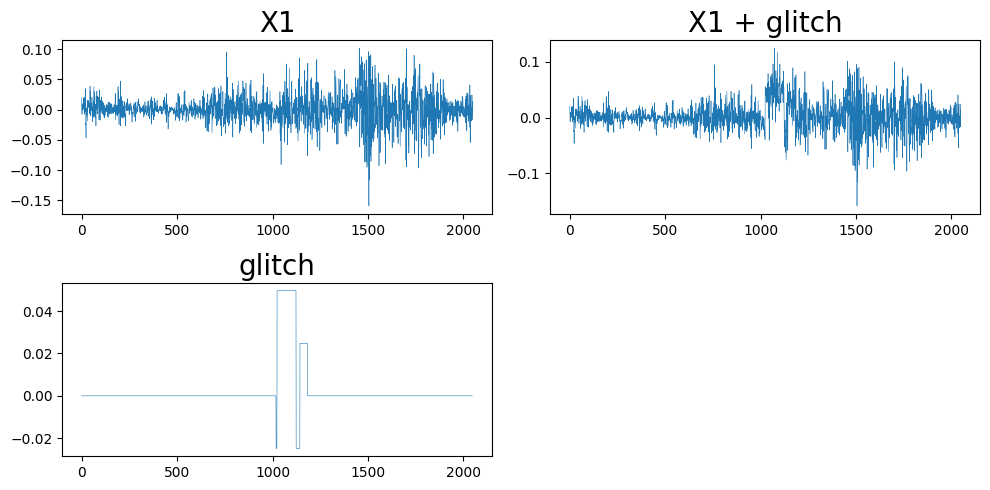

In [6]:
# sum two signals X1 + X2 where X2 is a "glitch"

T = 2 ** 11

# X1: background noise signal
dataset = load_data(process_name="mrw", R=21, T=T+1, H=0.5, lam=0.2)[:, 0, :]
dataset = dataset[:, 1:] - dataset[:, :-1]

X1 = copy.copy(dataset[0, :])

# X2: transient localized event, a "glitch"
X2 = np.zeros(T)
X2[T//2-5:T//2] = -1
X2[T//2:T//2+100] = 2
X2[T//2+100:T//2+120] = -1
X2[T//2+120:T//2+160] = 1
X2 /= (X2**2).mean()**0.5
X2 *= 0.5 * np.std(X1)

# plot
plt.figure(figsize=(10,5))
plt.subplot2grid((2,2), (0, 0))
plt.plot(X1, linewidth=0.4)
plt.title('X1', fontsize=20)

plt.subplot2grid((2,2), (1, 0))
plt.plot(X2, linewidth=0.4)
plt.title('glitch', fontsize=20)

plt.subplot2grid((2,2), (0, 1))
plt.plot(X1 + X2, linewidth=0.4)
plt.title('X1 + glitch', fontsize=20)

plt.tight_layout()

# Deglitch through gradient descent

In [7]:
# starting point
x0 = copy.copy(dataset[:20, :])
x0[0, :] += X2

# x_deglitched is an candidate for X1
# x_deglitched starts from X1 + X2 and tries to match the statistics of X1
x_deglitched = generate(dataset[1:, :], x0=x0[:,None,:], 
                        J=8, it=1000, tol_optim=5e-4)[0,0,:]


Data saving dir: gen_scat_cov_battle_lemarie_B20_N1_T2048_J[8, 8]_Q1_1_Q2_1_rmax2_model_cov_tol5_00e_04_it1000
gen_scat_cov: generating data.
Initialize model
Preparing target representation
Embedding: uses 174 coefficients spars=8 mean=1 ps=9 phaseenv=36 envelope=120
     3it in 0:00:02.57 ( 1.17it/s ) .... err 6.65E-02 -- max 7.40E-01 -- maxpct 1619.123% -- gerr 4.21E-03

 -- spars           max 1.54e-01 -- meanpct 4.57% -- maxpct 18.8%, 
 -- mean            max 1.64e-01 -- meanpct 167.64% -- maxpct 424.4%, 
 -- ps              max 7.40e-01 -- meanpct 12.32% -- maxpct 74.0%, 
 -- phaseenv        max 2.61e-01 -- meanpct 174.11% -- maxpct 1619.1%, 
 -- envelope        max 4.62e-01 -- meanpct 9.51% -- maxpct 708.7%, 
     6it in 0:00:04.01 ( 1.49it/s ) .... err 4.10E-02 -- max 5.22E-01 -- maxpct 1590.061% -- gerr 8.38E-04

 -- spars           max 2.16e-01 -- meanpct 4.02% -- maxpct 25.9%, 
 -- mean            max 1.35e-01 -- meanpct 160.34% -- maxpct 348.9%, 
 -- ps              max 5.2

/tmp/ipykernel_95858/3704444260.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((2, 3), (1, 1))


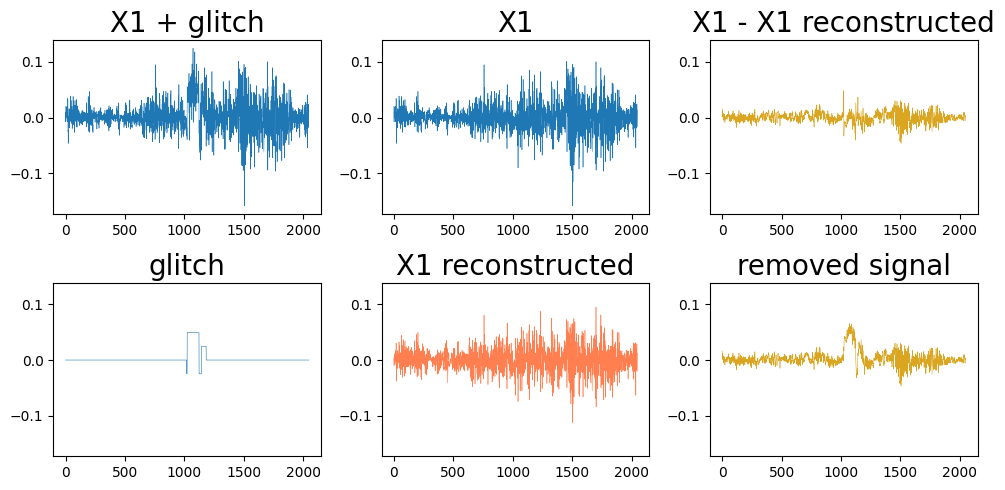

In [10]:
# ploting
plt.figure(figsize=(10,5))

ax = plt.subplot2grid((2, 3), (0, 0))
plt.plot(X1 + X2, linewidth=0.4)
plt.title('X1 + glitch', fontsize=20)
lim = ax.get_ylim()

plt.subplot2grid((2, 3), (1, 0))
plt.plot(X2, linewidth=0.4)
plt.title('glitch', fontsize=20)
plt.ylim(lim)

plt.subplot2grid((2, 3), (0, 1))
plt.plot(X1, linewidth=0.4)
plt.title('X1', fontsize=20)
plt.ylim(lim)

ax = plt.subplot2grid((2, 3), (1, 1))
plt.plot(x_deglitched, linewidth=0.4, color='coral')
plt.title('X1 reconstructed', fontsize=20)
plt.ylim(lim)

plt.subplot2grid((2, 3), (0, 2))
plt.plot(X1 - x_deglitched, linewidth=0.4, color='goldenrod')
plt.title('X1 - X1 reconstructed', fontsize=20)
plt.ylim(lim)
# plt.ylim(-0.1,0.13)

ax = plt.subplot2grid((2, 3), (1, 1))
plt.plot(x_deglitched, linewidth=0.4, color='coral')
plt.title('X1 reconstructed', fontsize=20)
plt.ylim(lim)

plt.subplot2grid((2, 3), (1, 2))
plt.plot(X1 + X2 - x_deglitched, linewidth=0.4, color='goldenrod')
plt.title('removed signal', fontsize=20)
plt.ylim(lim)
# plt.ylim(-0.1,0.13)


plt.tight_layout()